# <center> Correlating NGSS and State Based Science Standards </center>   

<p align="center">
  <img width="250" height="100" src="NGSS.png">
</p>
 
 [](NGSS.png) 
 
### <center> Capstone Project - The Flatiron School - By Kristen Davis </center>

#### Summary:  
In April of 2013 a collection of rigorous, and internationally benchmarked standards for K-12 science education standards were released called [Next Generation Science Standards (NGS)](https://www.nextgenscience.org/) . These standards were crafted to prepare students to be better decision makers about scientific and technical issues and to apply science to their daily lives.  

By blending core science knowledge with scientific practices, students are engaged in a more relevant context that deepens their understanding and helps them to build what they need to move forward with their education. However these standards were of voluntary adoption at the time and many states chose not to change their current (common core) standards. 

Currently 18 states have adopted the NGS fully for their K -12 science curriculum, 26 are 'aligned' to the NGS standards and 8 have independently developled standards. 'Alligning with' or 'aligned to' are terms often used by rarely quantified. By identifying word freqencies and text patterns in the NGS standards and comparing them to state standards that claim to be aligned to them, this project aims not only to provide insight into the similarities and differences of science education across America but also develop a tool that could be used more broadly to measure alignment. 

# Libraries & Data Packages

In [406]:
#custom functions 
import myfunctions as mf

In [316]:
#Data Analysis 
import pandas as pd
import numpy as np  
np.random.seed(0) 
import pickle

#Data Visulaization 
import matplotlib.pyplot as plt   
import plotly.express as px 
import plotly.graph_objects as go 
import plotly.figure_factory as ff 
from urllib.request import urlopen
import json 


#Natural Language Processing  
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize, FreqDist 
from sklearn.feature_extraction.text import TfidfTransformer  
from nltk.tokenize import sent_tokenize, word_tokenize 
from nltk.collocations import * 
import string 
import re 
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


#Modeling 
from sklearn.cluster import MiniBatchKMeans, KMeans 
from sklearn.decomposition import PCA 
from sklearn.metrics import silhouette_score, accuracy_score, calinski_harabasz_score 
from sklearn.datasets import fetch_20newsgroups 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split 
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.naive_bayes import MultinomialNB 

# General Text Preprocessing
Initial text cleaning, that applies global processing such as flattening, removing punction, numbers and basic stop words for each standards set. More exensive text specific processing done when working with specific text later in the notebook.

### NGSS Standards

In [317]:
#ngs standards, decriptions and dci
standard_df = pickle.load(open("ngsstandards.p", "rb" )) 
standard_df.head()

,dci,standard,tag
0,Motion and Stability: Forces and Interactions,Plan and conduct an investigation to compare t...,K-PS2-1
1,Motion and Stability: Forces and Interactions,Analyze data to determine if a design solution...,K-PS2-2
2,From Molecules to Organisms: Structures and Pr...,Use observations to describe patterns of what ...,K-LS1-1
3,Earth's Systems,Use and share observations of local weather co...,K-ESS2-1
4,Earth's Systems,Construct an argument supported by evidence fo...,K-ESS2-2


In [318]:
#ngs standards pdf file
ngs= general_processing('ngs_pdf')

I have the NGS standards as both a dataframe and PDF file, ultimately this is my primary tool of analysis and having both formats will help me gain a larger view of NGSS during NLP but the flexibility of the Dataframe fromat for modeling & comparison. 

### State Standards

In [407]:
ngss_states_list = ['alabama', 'alaska', 'arizona', 'colorado', 'flordia', 'georgia', 'idaho', 'louisiana', 'mass', 
             'minnesota', 'mississippi', 'missouri', 'montana', 'nebraksa', 'northdakota', 'oklahoma', 
              'southcarolina', 'southdakota', 'tennessee', 'utah', 'westvirginia', 'wisconsin', 'wyoming'] 

In [412]:
#ngss aligned states standards pdf 
ngss_states = []
for file in ngss_states_list:  
    output = general_processing(file)  
    ngss_states.append([file, output])

In [320]:
#ngss aligned states standards pdf
for file in ngss_states: 
    file = general_processing(file) 
    
#indiana *this was being a little fincky in the seperate notebook so I am just scraping it here directly*
pages = np.arange(0, 34, 1)  
indiana = [] 

for i in pages:   
    page = requests.get("https://www.doe.in.gov/science/framework") 
    soup = BeautifulSoup(page.text, 'html.parser')
    standards = soup.find_all('div', class_="view-content") 
    sleep(randint(2,10))  
    for standard in standards:  
        indiana.append(standard.text)

In [420]:
non_ngss_state_list = ['maine', 'michigan', 'northcarolina', 'ohio', 'pennsylvania', 'texas', 'virginia'] 

In [421]:
# non ngss aligned states standards pdfs
non_ngss_states = []
for file in non_ngss_state_list: 
    output = general_processing(file) 
    non_ngss_states.append([file, output])

All state standards PDF are now loaded, with general processing and tokenization. To reference a state's pdf if can be called using it's state's name. No spaces in between words.

In [425]:
non_ngss_state_list[0]

'maine'

# NGSS Standards EDA  
Analysis of the words used with in the NGSS standards document, this document contains not only the language of the standards but also the language developers chose to use to describe their process, the importance and framework of the standards. 

In [249]:
#look at the top 50 words on general process ngss  
ngss_generalclean_freqdist = FreqDist(ngs)
ngss_generalclean_freqdist.most_common(50)

[('hs', 1497),
 ('ess', 1412),
 ('ps', 1326),
 ('ms', 1295),
 ('ls', 1185),
 ('evidence', 467),
 ('core', 438),
 ('ideas', 415),
 ('energy', 389),
 ('include', 305),
 ('using', 304),
 ('information', 302),
 ('engineering', 299),
 ('use', 296),
 ('data', 292),
 ('students', 289),
 ('ets', 286),
 ('systems', 284),
 ('natural', 268),
 ('assessment', 266),
 ('disciplinary', 262),
 ('models', 259),
 ('solutions', 254),
 ('performance', 244),
 ('expectations', 240),
 ('earth', 239),
 ('concepts', 232),
 ('scientific', 216),
 ('design', 215),
 ('connections', 206),
 ('understanding', 201),
 ('explanations', 200),
 ('system', 197),
 ('practices', 192),
 ('matter', 179),
 ('statement', 179),
 ('model', 179),
 ('patterns', 176),
 ('clarification', 176),
 ('examples', 173),
 ('experiences', 170),
 ('builds', 168),
 ('grade', 165),
 ('different', 163),
 ('progresses', 163),
 ('framework', 159),
 ('describe', 158),
 ('based', 157),
 ('world', 156),
 ('organisms', 155)]

In [294]:
#remove additional stop words
ngss_stopwords_list = ['hs', 'ms', 'ls', 'ess', 'ps', 'state', 'standards', 
                       'permisssion', 'inc', 'september', 'rights reserved', 'ets']
ngss_processed = [word for word in ngs if word not in ngss_stopwords_list] 

#re examine frequency list
ngss_freqdist = FreqDist(ngss_processed)
ngss_freqdist.most_common(50)

[('evidence', 467),
 ('core', 438),
 ('ideas', 415),
 ('energy', 389),
 ('include', 305),
 ('using', 304),
 ('information', 302),
 ('engineering', 299),
 ('use', 296),
 ('data', 292),
 ('students', 289),
 ('systems', 284),
 ('natural', 268),
 ('assessment', 266),
 ('disciplinary', 262),
 ('models', 259),
 ('solutions', 254),
 ('performance', 244),
 ('expectations', 240),
 ('earth', 239),
 ('concepts', 232),
 ('scientific', 216),
 ('design', 215),
 ('connections', 206),
 ('understanding', 201),
 ('explanations', 200),
 ('system', 197),
 ('practices', 192),
 ('matter', 179),
 ('statement', 179),
 ('model', 179),
 ('patterns', 176),
 ('clarification', 176),
 ('examples', 173),
 ('experiences', 170),
 ('builds', 168),
 ('grade', 165),
 ('different', 163),
 ('progresses', 163),
 ('framework', 159),
 ('describe', 158),
 ('based', 157),
 ('world', 156),
 ('organisms', 155),
 ('support', 155),
 ('change', 154),
 ('problems', 141),
 ('education', 135),
 ('could', 134),
 ('objects', 133)]

In [295]:
#ngss bigram pairs
bigram_generator(ngss_processed, 50)

[(('core', 'ideas'), 0.006747417004427992),
 (('disciplinary', 'core'), 0.006067989597732118),
 (('performance', 'expectations'), 0.005599418972424618),
 (('clarification', 'statement'), 0.004123421502705995),
 (('framework', 'education'), 0.0031628517208256214),
 (('assessment', 'boundary'), 0.0029519949394372466),
 (('could', 'include'), 0.002928566408171872),
 (('boundary', 'assessment'), 0.002811423751844997),
 (('experiences', 'progresses'), 0.002670852564252747),
 (('achieve', 'rights'), 0.0023897101890682474),
 (('rights', 'reserved'), 0.0023897101890682474),
 (('demonstrate', 'understanding'), 0.0023428531265374973),
 (('crosscutting', 'concepts'), 0.0022022819389452475),
 (('cause', 'effect'), 0.0020851392826183725),
 (('constructing', 'explanations'), 0.002038282220087623),
 (('core', 'idea'), 0.002038282220087623),
 (('statement', 'emphasis'), 0.002038282220087623),
 (('statement', 'examples'), 0.001967996626291498),
 (('designing', 'solutions'), 0.0019445680950261229),
 (('

In [297]:
#ngss pmi pairs 
pmi_generator(ngss_processed, 50)

[(('ela', 'literacy'), 9.51178614989677),
 (('marked', 'asterisk'), 9.146501685815027),
 (('national', 'academy'), 9.127642658563708),
 (('permission', 'national'), 9.127642658563708),
 (('reprinted', 'permission'), 9.127642658563708),
 (('integrated', 'reprinted'), 9.109026980396363),
 (('reproduced', 'verbatim'), 9.109026980396363),
 (('section', 'entitled'), 9.109026980396363),
 (('nrc', 'document'), 9.101647450030764),
 (('cross', 'cutting'), 9.090411302229015),
 (('traditional', 'content'), 8.870867243201602),
 (('engaging', 'argument'), 8.788310046940893),
 (('following', 'elements'), 8.787771627438136),
 (('rights', 'reserved'), 8.722003857287117),
 (('achieve', 'rights'), 8.666508744695413),
 (('september', 'achieve'), 8.666508744695413),
 (('academy', 'sciences'), 8.63954169709514),
 (('asterisk', 'integrate'), 8.600013332908507),
 (('integrate', 'traditional'), 8.600013332908507),
 (('elements', 'nrc'), 8.587074277201008),
 (('idea', 'section'), 8.578512263697585),
 (('scienc

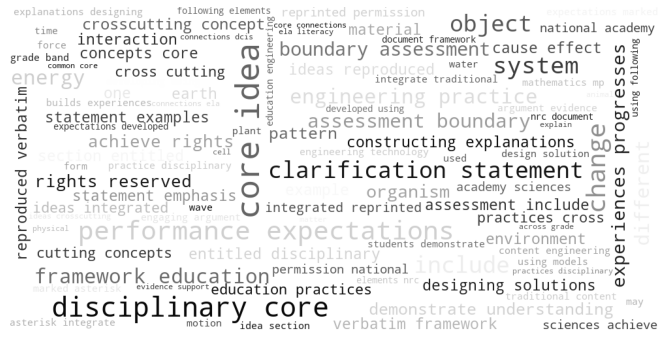

In [300]:
#ngss word cloud 
word_cloud(ngss_processed)

In [ ]:
#random forest feature importance 

It is very telling that the most common word in the NGSS is evidence, this framework is about students engaging hands on and evidence is a crucial piece of that. The majority of these show behaviros or patterns of interation and thinking that the standards what students to engage in rather than content areas specifically.

# Aligned State EDA

In [315]:
ngss_generalclean_freqdist = FreqDist('arizona')
ngss_generalclean_freqdist.most_common(50)

[('a', 2), ('r', 1), ('i', 1), ('z', 1), ('o', 1), ('n', 1)]

# Question Alignment  
In addition to looking at how standards align, I also wanted to explore questions and which class (NGS vs non NGS) the questions fall into.

In [ ]:
#ny state test 
ny_test_raw = open_and_flatten('new_york_state') 
ny_test_raw

In [ ]:
#classroom question set  
classroom_questions_csv = pd.read_csv('Capstone Data - Questions Set (2).csv')
classroom_questions = pd.DataFrame(classroom_questions_csv) 
classroom_questions.head()

# Appendix A: The Age of Science Standards by State (EDA) 
According to most DOE state websites standards are updated on a 5 year cycle. Some states update standards at a much higher rate than others. The dates below are the most current date I could find associated with the standards I am working with (as of January 2021). I am interested in seeing the distribution of states standard dates as well as how that breaks down between NGS adopted/ NGS aligned/ and Independent states.

In [376]:
#unpickle state dictionary
state_df = pd.read_pickle("./state_df.pkl") 
#transpose values
state_df = state_df.T 

In [377]:
#reset index
state_df.reset_index(inplace=True)

In [379]:
#set column name
state_df = state_df.rename(columns={'index': 'state'})   

two_letter = ['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 
 'ME', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 
 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY']
state_df['two_letter'] = two_letter 
state_df.head()

,state,update_year,standards,two_letter
0,alabama,2015,aligned,AL
1,alaskas,2017,aligned,AK
2,arizona,2018,aligned,AZ
3,arkansas,2016,adopted,AR
4,california,2013,adopted,CA


In [375]:
#visualize the age of science standards 
grouped_df = state_df.groupby('update_year').count() 
grouped_df

,state,standards,standards_encoded,two_letter
update_year,,,,
2002,1,1,1,1
2003,1,1,1,1
2004,1,1,1,1
2008,1,1,1,1
2013,6,6,6,6
2014,3,3,3,3
2015,8,8,8,8
2016,11,11,11,11
2017,5,5,5,5


In [393]:
#graph the stat counts by year and alignment
fig = go.Figure() 

years= [2002, 2003, 2004, 2008, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020] 

fig = go.Figure()
fig.add_trace(go.Bar(x=years,
                y=[0, 0, 0, 0, 6, 2, 5, 4, 0, 0, 0, 1],
                name='NGSS Adopted States',
                marker_color='rgb(75, 117, 156)'
                ))
fig.add_trace(go.Bar(x=years,
                y=[0, 0, 0, 0, 0, 1, 2, 7, 4, 3, 3, 3],
                name='NGSS Aligned States',
                marker_color='rgb(26, 118, 255)'
                )) 
fig.add_trace(go.Bar(x=years,
                y=[1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 2, 0],
                name='Independent Standards States',
                marker_color='rgb(135, 206, 235)'
                ))

fig.update_layout(
    title='Date of Science Standard Development by Standard Group',
    xaxis_tickfont_size=14,
    yaxis=dict(
        title='Total Number of States',
        titlefont_size=16,
        tickfont_size=14,
    ),
    legend=dict(
        x=0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='group',
    bargap=0.15, # gap between bars of adjacent location coordinates.
    bargroupgap=0.1 # gap between bars of the same location coordinate.
) 

fig.add_annotation(x=2002, y=1,
            text="Pennsylvania",
            showarrow=True,
            arrowhead=1) 

fig.add_annotation(x=2004, y=1,
            text="North Carolina",
            showarrow=True,
            arrowhead=1, 
            ax=-30,
            ay=-70) 

fig.add_annotation(x=2008, y=1,
            text="Flordia",
            showarrow=True,
            arrowhead=1)
fig.show()

NGSS standards were developed in 2013 so this increase in adopted states at that time makes sense. Those states have used NGSS cinec the beginning, there is a large spike 3 years after the inital release of states that are aligned with NGSS, this might be due to high efficacy of standards or simply the cycle of updating standards coincided with a few years into NGSS so it was less 'risky' to adopt. The outlier states with particularly old standards are all independent states. 

# Appendix B: Geographical Distribution of NGSS Standards 
Map the geographical distribution of the adoption of NGSS standards across the US. 

In [395]:
with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response: 
    counties = json.load(response)
    
fig = px.choropleth(state_df, locations='two_letter', locationmode="USA-states", color='standards', 
                    scope='usa', color_discrete_sequence=('rgb(26, 118, 255)', 'rgb(75, 117, 156)', 'rgb(135, 206, 235)'))  
                                                          #px.colors.qualitative.Bold) 
fig.update_layout(title_text = 'NGSS Standards Distribution')
fig.show()

# Appendix C: Clustering Classroom Questions by Content Area 
I am going to use KMeans clustering to group unlabled questions into subject categories. The science standards are seperated into 4 different domians: Life/Physical/ Earth & Space & Engineering. These questions represent the entire scope and sequence of questions asked in a 6th grade science classroom. 

### Data Preprocessing

In [ ]:
#feature extraction 
vec = TfidfVectorizer(stop_words="english")
X = vec.fit_transform(df.question.values) 

#create a dense matrix
features = X.todense()

### Build a Baseline Model

In [ ]:
#create an instance cluster  
model = KMeans(n_clusters=5, random_state=42)
model.fit(features) 

order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vec.get_feature_names()  

for i in range(5):
    print("Cluster {}:".format(i)),
    for ind in order_centroids[i, :10]:
        print('%s' % terms[ind])

In [ ]:
# reduce the features to 2D
pca = PCA(n_components=3, random_state=42) 
""" You can use more than two here! Only Plot 2 at a time"""
reduced_features = pca.fit_transform(features)

# reduce the cluster centers to 2D
reduced_cluster_centers = pca.transform(cls.cluster_centers_)

In [ ]:
#visulaize clustering 
plt.scatter(reduced_features[:,0], reduced_features[:,1], c=cls.predict(features))
plt.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:,1], marker='x', s=150, c='b')

In [ ]:
#access the accuracy of the score 
silhouette_score(features, labels=cls.predict(features))

This is not a very strong model, it has a low accuracy score and two of the clusters are overlapping heavily. I want to visually inspect the questions that it has classified into each cluster. 

### Generate a labeled dataset
Merge the labels generated with KMeans to better understand the types of questions the algotrithm has grouped together.

In [ ]:
#collect all the labels and values for the KMeans 
cluster_map = pd.DataFrame()
cluster_map['data_index'] = data.index.values
cluster_map['cluster'] = cls.labels_ 

#sanity check 
cluster_map.head()

In [ ]:
#merge the two dataframes on the index
result = df.join(cluster_map.set_index('data_index'))

#sanity check
result.loc[result['cluster'] == 2] 
result.loc[93, "question"]

Visualize each of the clusters and the questions inside of it.

In [ ]:
#cluster 1
result.loc[result['cluster'] == 1] 

This is clustering toward physical science.

In [ ]:
#cluster 2
result.loc[result['cluster'] == 2] 

This cluster is trending toward earth / space.

In [ ]:
#cluster 3
result.loc[result['cluster'] == 3] 

This cluster is not as clean as the first two - looks like a mix of cluster one & cluster two.

### Predict Question Type Given Question 
Use supervised learning techniques in combination with the labeled data to predict question type given a question.

In [ ]:
#define the target
X = result.drop('cluster', axis=1)
y = result['cluster']

In [ ]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
#vecotrize the X data 
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train.question) 
X_test_counts = count_vect.transform(X_test.question)

In [ ]:
#scale down impact of frequently occuring words
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts) 
X_test_tfidf = tfidf_transformer.fit_transform(X_test_counts) 

#look at the shape of each set 
print("X_train Shape:", X_train_tfidf.shape) 
print("X_test Shape:", X_test_tfidf.shape)

In [ ]:
#instatiate classifiers
mnb = MultinomialNB()
rf = RandomForestClassifier(n_estimators=100) 

#fit Multinomial classifier 
mnb.fit(X_train_tfidf, y_train)  

# NB Predictions
mnb_train_preds = nb_classifier.predict(X_train_tfidf) 
mnb_test_preds = nb_classifier.predict(X_test_tfidf) 

#fit Random Forest classifier 
rf.fit(X_train_tfidf, y_train)  

# RF Predictions 
rf_train_preds = rf.predict(X_train_tfidf) 
rf_test_preds = mnb.predict(X_test_tfidf)

In [ ]:
nb_train_score = accuracy_score(y_train, mnb_train_preds)
nb_test_score = accuracy_score(y_test, mnb_test_preds)
rf_train_score = accuracy_score(y_train, rf_train_preds)
rf_test_score = accuracy_score(y_test, rf_test_preds)

print("Multinomial Naive Bayes")
print("Training Accuracy: {:.4} \t\t Testing Accuracy: {:.4}".format(nb_train_score, nb_test_score))
print("")
print('-'*70)
print("")
print('Random Forest')
print("Training Accuracy: {:.4} \t\t Testing Accuracy: {:.4}".format(rf_train_score, rf_test_score))

While there is a strong accuracy score as is on this model I think it is overfitting and while class 1 & 2 (Physical Science and Earth Space Science) are strongly seperate clusters the other two groups I was hoping to identify (Engineering and Life Science) are not well represented. To improve this model there are obviously hyper parameters I could tune with a Grid Search but more than that I believe to make this model high quality a signifigant amount more data would need to be gathered. 

In [ ]:
"""TEST K FOLD PRECISION AND RECALL}""" 

"""Plot feature importance  

Grid search 

confusion matrix - what groups is it confusing together """